In [51]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

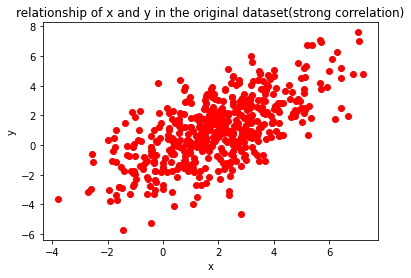

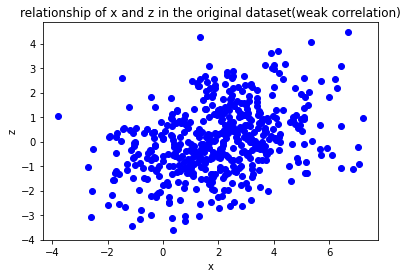

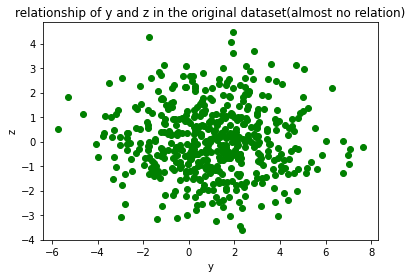

In [52]:
# generate the original dataset using python function
# assume that the x, y, z follow multivariate normal distribution
mean = np.array([2,1,0])
conv = np.array([[4.0, 3.0, 1.0],
        [3.0, 5.0, 0.1],
        [1.0, 0.1, 2.0]])
x, y, z = np.random.multivariate_normal(mean=mean, cov=conv, size=500).T

# ploy the original dataset
plt.plot(x, y, 'ro')
plt.title("relationship of x and y in the original dataset(strong correlation)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.plot(x, z, 'bo')
plt.title("relationship of x and z in the original dataset(weak correlation)")
plt.xlabel("x")
plt.ylabel("z")
plt.show()
plt.plot(y, z, 'go')
plt.title("relationship of y and z in the original dataset(almost no correlation)")
plt.xlabel("y")
plt.ylabel("z")
plt.show()

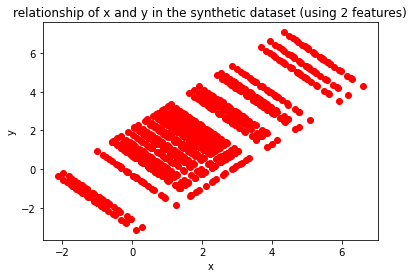

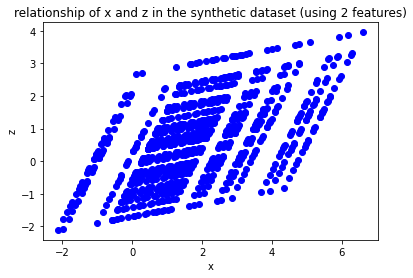

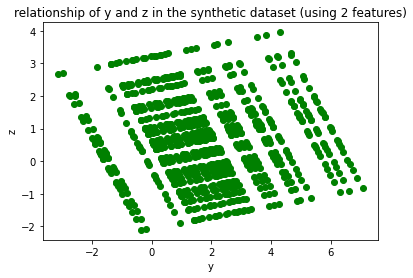

In [53]:
# use PCA to generate a synthetic dataset with 2 new features

# get eigenvalues and eigenvectors
l, v = np.linalg.eig(conv)

# calculate the largest two eigenvalues and transformation matrix
max_index = np.argpartition(l,-2)[-2:]
matrix = np.zeros((3,2))
for i in range(1,-1,-1):
    matrix[:,1-i] = v[:,max_index[i]]

# calculate new mean and variance
nmean = np.dot(mean, matrix)
var = np.zeros(3)
for i in range(0,3):
    var[i]=conv[i,i]
nvar = np.dot(var, matrix*matrix)
k = np.sqrt(nvar)

# sample for the new features
s0 = np.random.normal(nmean[0], k[0], 30)
s1 = np.random.normal(nmean[1], k[1], 30)

# make Cartesian production
A = list(itertools.product(s0,s1))

# convert them back
syn = np.dot(A, matrix.T)

# plot the synthetic dataset
plt.plot(syn[:,0], syn[:,1], 'ro')
plt.title("relationship of x and y in the synthetic dataset(strong correlation)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.plot(syn[:,0], syn[:,2], 'bo')
plt.title("relationship of x and z in the synthetic dataset(weak correlation)")
plt.xlabel("x")
plt.ylabel("z")
plt.show()
plt.plot(syn[:,1], syn[:,2], 'go')
plt.title("relationship of y and z in the synthetic dataset(almost no correlation)")
plt.xlabel("y")
plt.ylabel("z")
plt.show()